In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
points_n = 200
clusters_n = 3
iteration_n = 20
points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
print(points.shape)
centroids = tf.constant(tf.slice(tf.compat.v1.random_shuffle(points), [0, 0], [clusters_n, -1]))
print(centroids.shape)

points_expanded = tf.expand_dims(points, 0)
print("points expanded shape {}".format(points_expanded.shape))

(200, 2)
(3, 2)
points expanded shape (1, 200, 2)


In [3]:
#@tf.function
def update_centroids(points_expanded, centroids):
    centroids_expanded = tf.expand_dims(centroids, 1)
    print("points expanded shape {}".format(points_expanded.shape))
    print("centroids expanded shape {}".format(centroids_expanded.shape))

    distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
    print(distances.shape)
    assignments = tf.argmin(distances, 0)
    print(assignments.shape)
    print(assignments.numpy())
    means = []
    for c in range(clusters_n):
        print(tf.where(tf.equal(assignments, c)).shape)
        ruc = tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])
        print(ruc.shape)
        ruc = tf.gather(points, ruc)
        print(ruc.shape)
        ruc = tf.reduce_mean(ruc, axis=[1])
        print(ruc.shape)
        means.append(ruc)
        new_centroids = tf.concat(means, 0)
        
    return new_centroids, assignments

points expanded shape (1, 200, 2)
centroids expanded shape (3, 1, 2)
(3, 200)
(200,)
[0 0 0 1 1 2 1 1 1 2 1 1 0 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 0 0 2 1 2 2 1 2
 1 2 1 1 2 0 1 1 1 1 0 2 2 0 1 0 0 1 2 2 1 2 1 2 2 1 1 2 0 0 1 1 1 1 1 2 0
 2 1 0 2 2 2 0 0 2 0 2 2 1 1 2 2 1 2 1 1 1 0 1 1 1 2 2 2 0 1 1 2 2 1 1 1 1
 0 2 0 2 1 1 1 1 0 2 1 0 1 1 2 1 2 1 2 1 2 1 2 1 1 2 2 0 1 2 1 2 1 1 1 1 1
 2 1 1 1 2 1 1 1 1 0 1 0 1 0 0 1 0 0 1 2 1 1 1 1 2 1 2 1 0 1 1 0 1 1 1 2 1
 1 1 1 1 1 2 1 2 2 1 1 1 2 2 2]
(40, 1)
(1, 40)
(1, 40, 2)
(1, 2)
(103, 1)
(1, 103)
(1, 103, 2)
(1, 2)
(57, 1)
(1, 57)
(1, 57, 2)
(1, 2)
points expanded shape (1, 200, 2)
centroids expanded shape (3, 1, 2)
(3, 200)
(200,)
[0 0 0 1 0 2 1 1 2 2 1 1 0 1 1 0 1 0 0 1 0 0 2 2 0 0 0 0 0 0 0 2 2 2 2 1 2
 1 2 1 1 2 0 1 0 1 1 0 2 2 0 1 0 0 1 2 2 1 2 0 2 2 1 0 2 0 0 1 1 1 1 0 2 0
 2 1 0 2 2 2 0 0 2 0 2 2 1 1 2 2 1 2 1 1 1 0 1 1 1 2 2 2 0 1 1 2 2 1 1 1 1
 0 2 0 2 0 1 1 1 0 2 1 0 1 1 2 0 2 1 2 1 2 1 2 1 1 2 2 0 1 2 1 2 1 1 1 1 1
 2 1 1 1 2 1 1 1 1

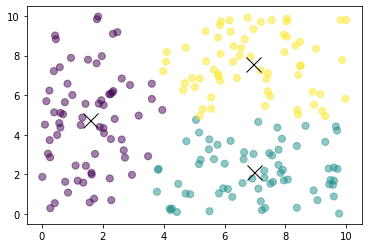

In [4]:
for _ in range(iteration_n):
    centroids, assignments = update_centroids(points_expanded, centroids)


plt.scatter(points[:, 0], points[:, 1], c=assignments, s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()

In [5]:
import cv2

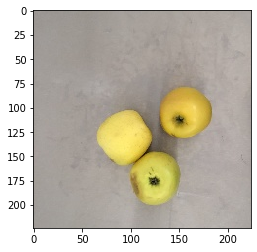

In [6]:
image = cv2.imread("test_images/apple_01.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [23]:
image_tensor = tf.convert_to_tensor(image)
print(image_tensor.shape)
image_tensor = tf.reshape(image_tensor, [50176, 3])
print(image_tensor.shape)

clusters_n = 3
iteration_n = 20
#centroids = tf.constant(tf.slice(tf.compat.v1.random_shuffle(image_tensor), [0, 0], [clusters_n, -1]))
centroids = tf.constant(tf.slice(tf.random.shuffle(image_tensor), [0, 0], [clusters_n, -1]))
print(centroids.shape)

image_expanded = tf.expand_dims(image_tensor, 0)
print("points expanded shape {}".format(image_tensor.shape))

image_tensor = tf.cast(image_tensor, tf.float32)
image_expanded = tf.cast(image_expanded, tf.float32)
centroids = tf.cast(centroids, tf.float32)

(224, 224, 3)
(50176, 3)
(3, 3)
points expanded shape (50176, 3)


In [24]:
@tf.function
def update_centroids(points_expanded, centroids):
    centroids_expanded = tf.expand_dims(centroids, 1)

    distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
    assignments = tf.argmin(distances, 0)

    means = []
    for c in range(clusters_n):
        ruc = tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])
        ruc = tf.gather(image_tensor, ruc)
        ruc = tf.reduce_mean(ruc, axis=[1])
        means.append(ruc)
        new_centroids = tf.concat(means, 0)
        
    return new_centroids, assignments

In [25]:
for _ in range(iteration_n):
    centroids, assignments = update_centroids(image_expanded, centroids)


In [26]:
centroids

<tf.Tensor: id=2088, shape=(3, 3), dtype=float32, numpy=
array([[168.38687 , 161.57509 , 155.97253 ],
       [136.38708 , 120.73838 ,  75.059235],
       [220.7891  , 200.12285 ,  88.50556 ]], dtype=float32)>

In [27]:
colors = centroids.numpy()
colors[0][0]

168.38687

In [28]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

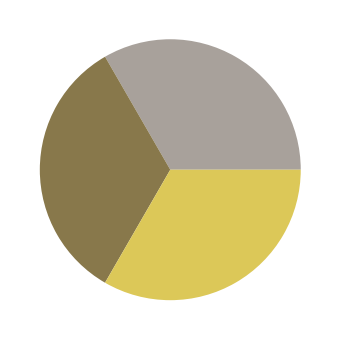

In [29]:
hex_colors = [RGB2HEX(c) for c in colors]


plt.figure(figsize = (8, 6))
plt.pie([3, 3, 3], colors=hex_colors)
plt.show()

In [64]:
class KMeans:
    def __init__(self, num_clusters, num_iterations):
        self.num_clusters = num_clusters
        self.num_iterations = num_iterations
        
    def update_centroids(self, input_tensor, input_expanded, centroids):
        centroids_expanded = tf.expand_dims(centroids, 1)

        distances = tf.reduce_sum(tf.square(tf.subtract(input_expanded, centroids_expanded)), 2)
        assignments = tf.argmin(distances, 0)

        means = []
        for c in range(self.num_clusters):
            ruc = tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])
            ruc = tf.gather(input_tensor, ruc)
            ruc = tf.reduce_mean(ruc, axis=[1])
            means.append(ruc)
            new_centroids = tf.concat(means, 0)
        
        return new_centroids, assignments
        
    def predict(self, input_tensor):
        input_shape = input_tensor.shape.as_list()
        dims = 1
        for i in range(len(input_shape)-1):
            dims *= input_shape[i]
        
        input_tensor = tf.reshape(input_tensor, [dims, input_shape[-1]])
        
        input_shuffle = tf.random.shuffle(input_tensor)
        centroids = tf.constant(tf.slice(input_shuffle, [0, 0], [self.num_clusters, -1]))
        
        input_expanded = tf.expand_dims(input_tensor, 0)
        
        input_tensor = tf.cast(input_tensor, tf.float32)
        input_expanded = tf.cast(input_expanded, tf.float32)
        centroids = tf.cast(centroids, tf.float32)
        
        for _ in range(self.num_iterations):
            centroids, assignments = self.update_centroids(input_tensor, input_expanded, centroids)
            
        return centroids


In [65]:
def test_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
    
    image_tensor2 = tf.convert_to_tensor(image)

    k_means = KMeans(3, 20)
    colors = k_means.predict(image_tensor2)
    colors = colors.numpy()
    print(colors)
    
    hex_colors = [RGB2HEX(c) for c in colors]

    plt.figure(figsize = (8, 6))
    plt.pie([3, 3, 3], colors=hex_colors)
    plt.show()

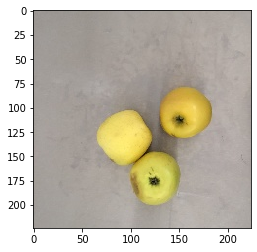

[[168.38687  161.57509  155.97253 ]
 [220.7891   200.12285   88.50556 ]
 [136.38708  120.73838   75.059235]]


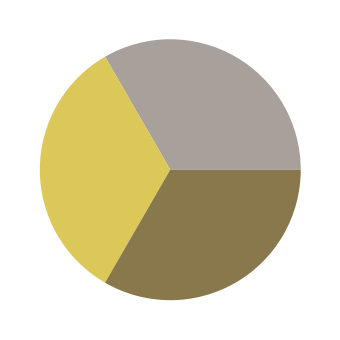

In [66]:
test_image("test_images/apple_01.JPG")

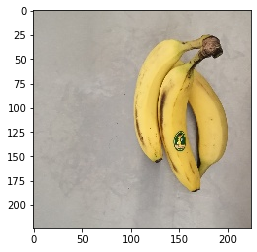

[[220.91904  187.87729   92.184685]
 [175.0527   169.28423  161.85802 ]
 [122.46694   98.10694   48.172653]]


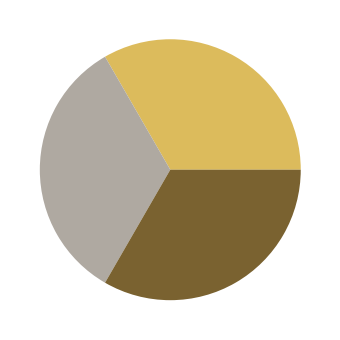

In [67]:
test_image("test_images/banana_01.JPG")

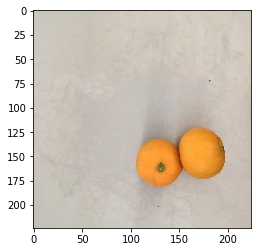

[[201.89217  195.00023  185.5823  ]
 [227.336    143.37407   50.193207]
 [182.63974  170.40865  160.23322 ]]


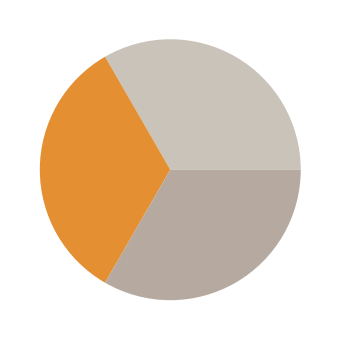

In [68]:
test_image("test_images/orange_01.JPG")

In [77]:
t = tf.ones([2, 10, 10, 3])

def prueba(x):
    print(x.shape)
    return tf.zeros([5, 5, 3])
    
tf.map_fn(prueba, t)

(10, 10, 3)
(10, 10, 3)


<tf.Tensor: id=18528, shape=(2, 5, 5, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

In [78]:
from tensorflow.keras import layers

In [158]:
class ColorExtractor(layers.Layer):
    def __init__(self, num_clusters, num_iterations):
        super(ColorExtractor, self).__init__()
        self.num_clusters = num_clusters
        self.num_iterations = num_iterations
        
    def build(self, input_shape):
        self.resize = input_shape[1] * input_shape[2]
        self.dims = input_shape[-1]

    def call(self, inputs):
        def extract_color(input_tensor):
            input_tensor = tf.cast(input_tensor, tf.float32)
            input_shape = input_tensor.shape.as_list()

            input_tensor = tf.reshape(input_tensor, [self.resize, input_shape[-1]])

            input_shuffle = tf.random.shuffle(input_tensor)
            #centroids = tf.constant(tf.slice(input_shuffle, [0, 0], [self.num_clusters, -1]))
            centroids = tf.slice(input_shuffle, [0, 0], [self.num_clusters, -1])

            input_expanded = tf.expand_dims(input_tensor, 0)

            #input_tensor = tf.cast(input_tensor, tf.float32)
            #input_expanded = tf.cast(input_expanded, tf.float32)
            #centroids = tf.cast(centroids, tf.float32)

            for _ in range(self.num_iterations):
                centroids, assignments = self.update_centroids(input_tensor, input_expanded, centroids)
                
            #centroids = tf.reshape(centroids, [self.dims * self.num_clusters, 1])

            return centroids
        
        return tf.map_fn(extract_color, inputs, dtype=tf.float32)
    
    @tf.function
    def update_centroids(self, input_tensor, input_expanded, centroids):
        centroids_expanded = tf.expand_dims(centroids, 1)

        distances = tf.reduce_sum(tf.square(tf.subtract(input_expanded, centroids_expanded)), 2)
        assignments = tf.argmin(distances, 0)

        means = []
        for c in range(self.num_clusters):
            ruc = tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])
            ruc = tf.gather(input_tensor, ruc)
            ruc = tf.reduce_mean(ruc, axis=[1])
            means.append(ruc)
            new_centroids = tf.concat(means, 0)
        
        return new_centroids, assignments

In [159]:
def load_image_tensor(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image_tensor = tf.convert_to_tensor(image)
    image_tensor /= 255
    image_tensor = tf.expand_dims(image_tensor, 0)
    
    return image_tensor

In [160]:
img01 = load_image_tensor("test_images/apple_01.JPG")
img02 = load_image_tensor("test_images/banana_01.JPG")
img03 = load_image_tensor("test_images/orange_01.JPG")

images = tf.concat([img01, img02, img03], 0)

print(images.shape)

(3, 224, 224, 3)


In [161]:
color_layer = ColorExtractor(3, 20)

res = color_layer(images)

In [162]:
res

<tf.Tensor: id=21149, shape=(3, 3, 3), dtype=float32, numpy=
array([[[0.66017073, 0.63344663, 0.6115285 ],
        [0.53518087, 0.47401455, 0.29614416],
        [0.865814  , 0.7847641 , 0.3470509 ]],

       [[0.4802622 , 0.38473395, 0.18891332],
        [0.68627805, 0.66369694, 0.63460344],
        [0.86634046, 0.7367706 , 0.36151055]],

       [[0.7924268 , 0.76510096, 0.7277518 ],
        [0.89119107, 0.562168  , 0.19708629],
        [0.7199828 , 0.6736439 , 0.63446134]]], dtype=float32)>

In [163]:
def plot_colors(colors):
    hex_colors = [RGB2HEX(c) for c in colors]

    plt.figure(figsize = (8, 6))
    plt.pie([3, 3, 3], colors=hex_colors)
    plt.show()

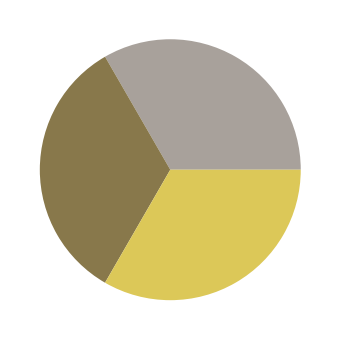

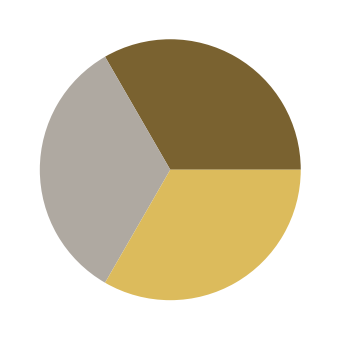

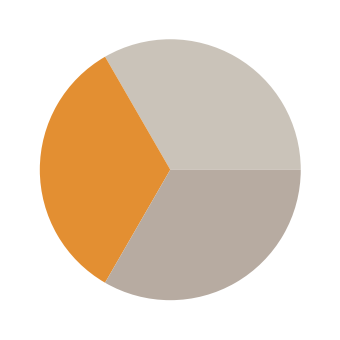

In [164]:
res *= 255
images_colors = res.numpy()

plot_colors(images_colors[0])
plot_colors(images_colors[1])
plot_colors(images_colors[2])